In [8]:
import os
import sys
import subprocess

os.environ["FLAGS_allocator_strategy"] = 'auto_growth'
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np
import json
import time
import logging
from PIL import Image
import tools.infer.utility as utility
import tools.infer.predict_rec as predict_rec
import tools.infer.predict_det as predict_det
import tools.infer.predict_cls as predict_cls
from tools.infer.predict_system import TextSystem
from ppocr.utils.utility import get_image_file_list, check_and_read_gif
from ppocr.utils.logging import get_logger
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image
import argparse
from paddleocr_config import get_config
logger = get_logger()


In [9]:
text_detector = './inference/en_PP-OCRv3_det_infer.onnx'
text_recognizer = './inference/PPOCRv3_rec_lisenceplate_27112022.onnx'
use_onnx = True

args = get_config(text_detector = text_detector, text_recognizer=text_recognizer, use_onnx=use_onnx)

In [14]:
count = 0
path_test = '/home/ubuntu/ds-veritone-energy/nhung/output_model/bienso'
df_res = {}
for img_name in os.listdir(path_test):
    count = count+1
    print(f'Image {count}: {img_name}')
    img_path = os.path.join(path_test,img_name)
    # fig, ax = plt.subplots(1,1)  
    # img_plot = Image.open(img_path)
    # plt.imshow(img_plot)

    args.image_dir = img_path
    image_file = args.image_dir
    text_sys = TextSystem(args)


    save_result = ""
    total_time = 0
    _st = time.time()

    img = cv2.imread(image_file)
    if img is None:
        logger.debug("error in loading image:{}".format(image_file))

    starttime = time.time()
    dt_boxes, rec_res = text_sys(img)
    elapse = time.time() - starttime
    total_time += elapse

    # for text, score in rec_res:
    #     logger.debug("{}, {:.3f}".format(text, score))
    #print(str(img_name) + "  Predict time of %s: %.3fs" % (image_file, elapse))
    for text, score in rec_res:
        save_result = save_result + text
    res = [{
         "transcription": rec_res[idx][0],
         "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
    } for idx in range(len(dt_boxes))]
    print(save_result)
    df_res[img_name] = save_result
    # if len(res)>0:
    #     for box in res:
    #         x1, x2, x3, x4 = box['points']
    #         try:
    #             cv2.imwrite('/home/os/Desktop/SETA/PaddleOCR-Studycases/train_data_lisenceplate_27112022/'+str(img_name[:-4])+'_'+str(box['transcription'])+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
    #         except:
    #             print('Error for ', img_name)

Image 1: 1668707445.png
XADAL
Image 2: 1668701888.png
BAA210
Image 3: 1668701918.png
ULT
Image 4: 1668707479.png
IUNDDNALTI3
Image 5: 1668707493.png
BDILCZDA5
Image 6: 1668707476.png
T3OLXL2L7
Image 7: 1668707461.png
HALUA2
Image 8: 1668701927.png
BDILCZDA5
Image 9: 1668701895.png
HALUA2
Image 10: 1668707471.png
RTDNTM3
Image 11: 1668707442.png
CXVT7LAT0
Image 12: 1668707468.png
BDISBTA5D8
Image 13: 1668701909.png
T3OLXL2L7
Image 14: 1668701930.png
ROBTi0S0
Image 15: 1668701902.png
BDISBTA5D8
Image 16: 1668707453.png
BAA210
Image 17: 1668701898.png
CXAAA
Image 18: 1668701874.png
TRIOYHVIS
Image 19: 1668701905.png
RTDNTM3
Image 20: 1668701880.png
XADAL
Image 21: 1668707450.png
LIUCXTLTL
Image 22: 1668701884.png
LIUCXTLTL
Image 23: 1668707440.png
TRIOYHVIS
Image 24: 1668707484.png
ULT
Image 25: 1668707464.png
CXAAA
Image 26: 1668701921.png
ILTCBL0
Image 27: 1668701876.png
CXVT7LAT0
Image 28: 1668701891.png
D5ZL
Image 29: 1668707496.png
ROBTi0S0
Image 30: 1668701913.png
IUNDDNALTI3
Image 

In [16]:
import pandas as pd
df1 = pd.DataFrame.from_dict(df_res, orient='index')
df1.columns = ['1411']

In [17]:
df2 = pd.DataFrame.from_dict(df_res, orient='index')
df2.columns = ['2711']

In [18]:
df = pd.concat([df1, df2], axis=1)

,1411,2711
1668707445.png,XADAL,XADAL
1668701888.png,BAA210,BAA210
1668701918.png,ULT,ULT
1668707479.png,IUNDDNALTI3,IUNDDNALTI3
1668707493.png,BDILCZDA5,BDILCZDA5
1668707476.png,T3OLXL2L7,T3OLXL2L7
1668707461.png,HALUA2,HALUA2
1668701927.png,BDILCZDA5,BDILCZDA5
1668701895.png,HALUA2,HALUA2
1668707471.png,RTDNTM3,RTDNTM3


: 

In [10]:
args.image_dir = '/home/ubuntu/ds-veritone-energy/nhung/output_model/bienso/33105540.png'
image_file = args.image_dir
text_sys = TextSystem(args)


save_results = []
total_time = 0
cpu_mem, gpu_mem, gpu_util = 0, 0, 0
_st = time.time()
count = 0

img = cv2.imread(image_file)
if img is None:
    logger.debug("error in loading image:{}".format(image_file))

starttime = time.time()
dt_boxes, rec_res = text_sys(img)
elapse = time.time() - starttime
total_time += elapse

# for text, score in rec_res:
#     logger.debug("{}, {:.3f}".format(text, score))
print(str(image_file) + "  Predict time of %s: %.3fs" % (image_file, elapse))
res = [{
    "transcription": rec_res[idx][0],
    "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
} for idx in range(len(dt_boxes))]
img_name = args.image_dir.split('/')[-1]
for box in res:
    x1, x2, x3, x4 = box['points']
    cv2.imwrite('/home/os/Desktop/SETA/PaddleOCR-Studycases/train_data_lisenceplate_27112022/'+img_name+'_'+box['transcription']+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
res 


/home/ubuntu/ds-veritone-energy/nhung/output_model/bienso/33105540.png  Predict time of /home/ubuntu/ds-veritone-energy/nhung/output_model/bienso/33105540.png: 0.229s


[{'transcription': 'HALUA2',
  'points': [[12, 46], [85, 33], [94, 74], [21, 87]]}]

In [11]:
x1, x2, x3, x4 = res[0]['points']

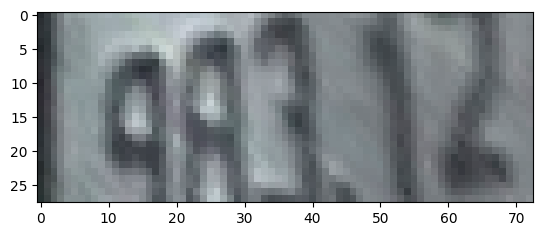

In [13]:
plt.imshow(img[x1[1]:x3[1], x1[0]:x2[0]])